In [1]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # 

In [2]:
path = r'C:\Users\Nbdav\World Happiness analysis'

In [3]:
#importing data sets
df_world = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'world_hap.csv'), index_col = False)


In [4]:
#importing data sets
df_21 = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'world_hap_21.csv'), index_col = False)

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = '68QAaRq7wWCEzYrJhUag'

In [17]:
data = quandl.get('ODA/USA_LUR')

# this is unemployment data for the usa

In [18]:
data.head(10)

,Value
Date,
1980-12-31,7.175
1981-12-31,7.617
1982-12-31,9.708
1983-12-31,9.600
1984-12-31,7.508
1985-12-31,7.192
1986-12-31,7.000
1987-12-31,6.175
1988-12-31,5.492


In [19]:
data.shape

(45, 1)

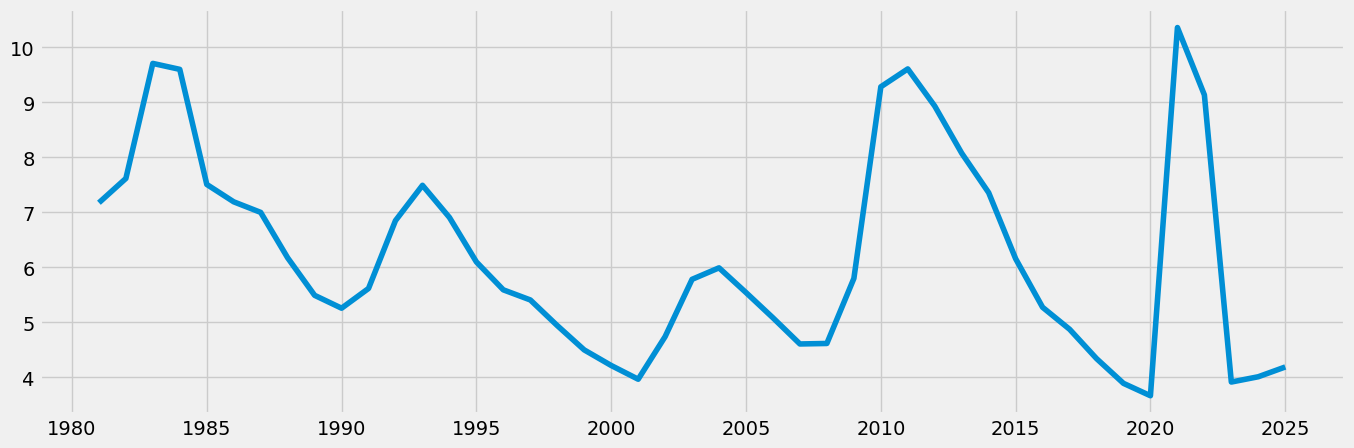

In [20]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [21]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [22]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-12-01') & (data_2['Date'] < '2025-06-01')]

In [23]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-12-31,7.175
1981-12-31,7.617
1982-12-31,9.708
1983-12-31,9.600
1984-12-31,7.508


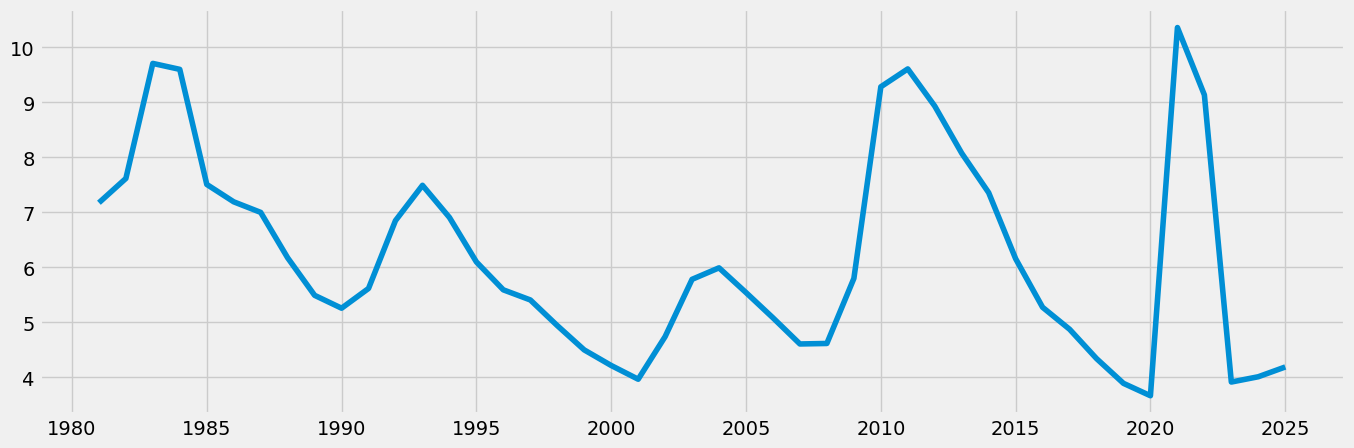

In [24]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [25]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

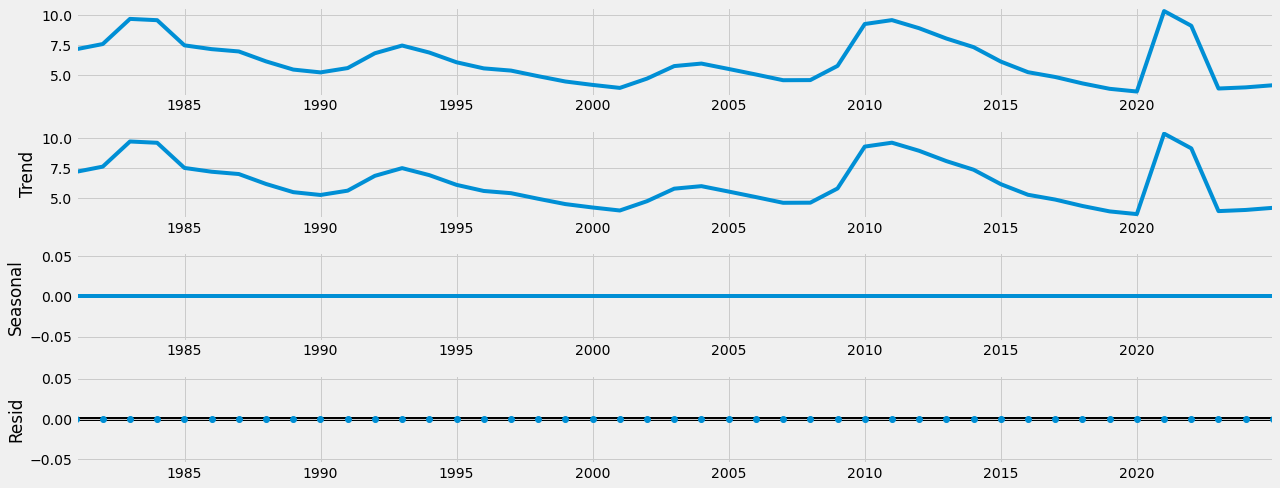

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

In [28]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.942809
p-value                         0.001741
Number of Lags Used             1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


**Pvalue is less than .05 so we know it is significant. The test statistic is smaller than the critical value at all percentages so we can reject the null. 
I used this data as i know unemployment can affect happiness within a country but there are too many different tables and data. There isnt a global data i found.

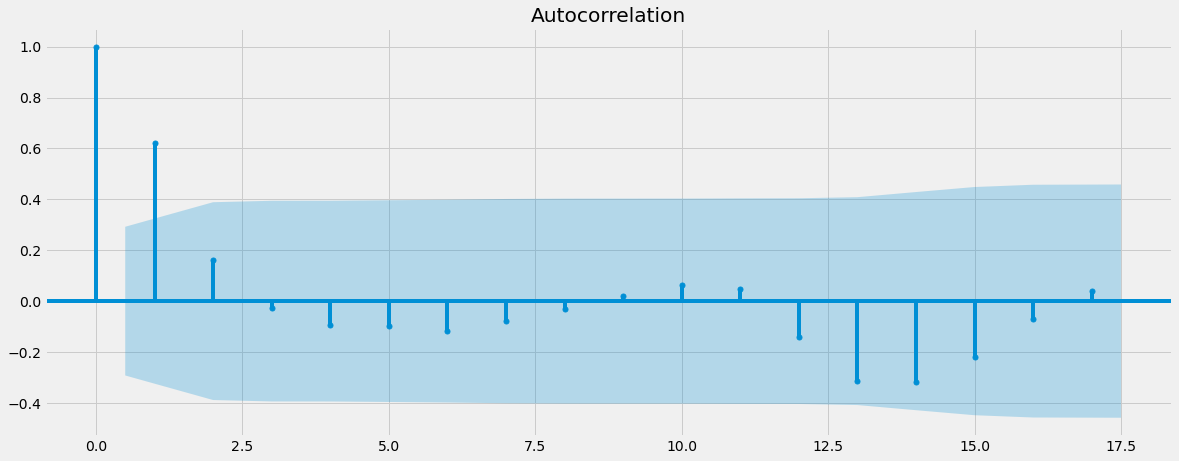

In [29]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

**Only a few lines over the correlation line. 